In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r"C:\Users\MadiL\Thesis CodeBase\Longitudinal\Individual Questions\long_questions.csv")



In [10]:
# Longitudinal analysis

# Step 1: Remove duplicate rows with the same 'Survey' and 'EndDate'
df_cleaned = df.drop_duplicates(subset=['Question', 'StartDate'])

# Step 2: Convert StartDate and EndDate to datetime format
# Modify directly on the DataFrame using .loc
df_cleaned.loc[:, 'StartDate'] = pd.to_datetime(df_cleaned['StartDate'], errors='coerce')

# Combine all question columns into one list
question_columns = ['LSAS_anx1', 'LSAS_anx2', 'LSAS_anx3', 'LSAS_anx4', 'LSAS_anx5', 'LSAS_anx6', 'LSAS_anx7', 'LSAS_anx8', 'LSAS_anx9', 'LSAS_anx10', 'LSAS_anx11', 'LSAS_anx12', 'LSAS_anx13', 'LSAS_anx14', 'LSAS_anx15', 'LSAS_anx16', 'LSAS_anx17', 'LSAS_anx18', 'LSAS_anx19', 'LSAS_anx20', 'LSAS_anx21', 'LSAS_anx22', 'LSAS_anx23', 'LSAS_anx24', 'LSAS_avo1', 'LSAS_avo2', 'LSAS_avo3', 'LSAS_avo4', 'LSAS_avo5', 'LSAS_avo6', 'LSAS_avo7', 'LSAS_avo8', 'LSAS_avo9', 'LSAS_avo10', 'LSAS_avo11', 'LSAS_avo12', 'LSAS_avo13', 'LSAS_avo14', 'LSAS_avo15', 'LSAS_avo16', 'LSAS_avo17', 'LSAS_avo18', 'LSAS_avo19', 'LSAS_avo20', 'LSAS_avo21', 'LSAS_avo22', 'LSAS_avo23', 'LSAS_avo24', 'BDI1', 'BDI2', 'BDI3', 'BDI4', 'BDI5', 'BDI6', 'BDI7', 'BDI8', 'BDI9', 'BDI10', 'BDI11', 'BDI12', 'BDI13', 'BDI14', 'BDI15', 'BDI16', 'BDI17', 'BDI18', 'BDI19', 'BDI20', 'CFS1', 'CFS2_R', 'CFS3_R', 'CFS4', 'CFS5_R', 'CFS6', 'CFS7', 'CFS8', 'CFS9', 'CFS10_R', 'CFS11', 'CFS12']


# Step 3: Split the dataset by Survey type (LSAS, BDI, CFS)
question_data = {question: df_cleaned[df_cleaned['Question'] == question] for question in question_columns}

# Verify data after cleaning and splitting
df_cleaned.info(), {k: v.shape for k, v in question_data.items()}




<class 'pandas.core.frame.DataFrame'>
Index: 7920 entries, 0 to 374472
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Participant_Number  7920 non-null   float64
 1   StartDate           7920 non-null   object 
 2   EndDate             7920 non-null   object 
 3   Question            7920 non-null   object 
 4   Score               7920 non-null   float64
 5   Standardized_Score  7920 non-null   float64
dtypes: float64(3), object(3)
memory usage: 433.1+ KB


(None,
 {'LSAS_anx1': (99, 6),
  'LSAS_anx2': (99, 6),
  'LSAS_anx3': (99, 6),
  'LSAS_anx4': (99, 6),
  'LSAS_anx5': (99, 6),
  'LSAS_anx6': (99, 6),
  'LSAS_anx7': (99, 6),
  'LSAS_anx8': (99, 6),
  'LSAS_anx9': (99, 6),
  'LSAS_anx10': (99, 6),
  'LSAS_anx11': (99, 6),
  'LSAS_anx12': (99, 6),
  'LSAS_anx13': (99, 6),
  'LSAS_anx14': (99, 6),
  'LSAS_anx15': (99, 6),
  'LSAS_anx16': (99, 6),
  'LSAS_anx17': (99, 6),
  'LSAS_anx18': (99, 6),
  'LSAS_anx19': (99, 6),
  'LSAS_anx20': (99, 6),
  'LSAS_anx21': (99, 6),
  'LSAS_anx22': (99, 6),
  'LSAS_anx23': (99, 6),
  'LSAS_anx24': (99, 6),
  'LSAS_avo1': (99, 6),
  'LSAS_avo2': (99, 6),
  'LSAS_avo3': (99, 6),
  'LSAS_avo4': (99, 6),
  'LSAS_avo5': (99, 6),
  'LSAS_avo6': (99, 6),
  'LSAS_avo7': (99, 6),
  'LSAS_avo8': (99, 6),
  'LSAS_avo9': (99, 6),
  'LSAS_avo10': (99, 6),
  'LSAS_avo11': (99, 6),
  'LSAS_avo12': (99, 6),
  'LSAS_avo13': (99, 6),
  'LSAS_avo14': (99, 6),
  'LSAS_avo15': (99, 6),
  'LSAS_avo16': (99, 6),
  'LSAS_avo

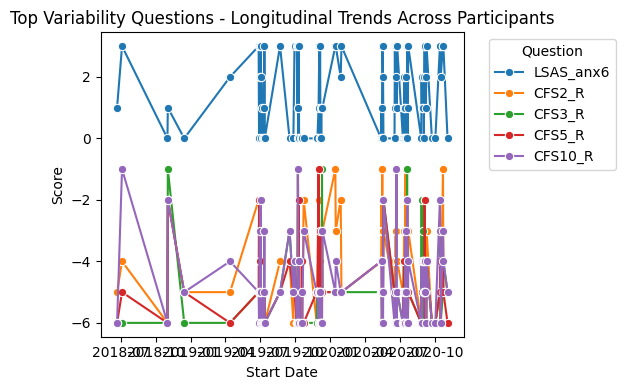

In [11]:
# Calculate score variance for each question
score_variance = df_cleaned.groupby('Question')['Score'].var().reset_index()
score_variance = score_variance.rename(columns={'Score': 'Variance'})

# Select top 5 questions with the highest variance
top_questions = score_variance.nlargest(5, 'Variance')['Question']

# Filter data for these questions
filtered_data = df_cleaned[df_cleaned['Question'].isin(top_questions)]

# Plot trends for top-variance questions
plt.figure(figsize=(6, 4))
sns.lineplot(data=filtered_data, x='StartDate', y='Score', hue='Question', marker='o')
plt.title('Top Variability Questions - Longitudinal Trends Across Participants')
plt.xlabel('Start Date')
plt.ylabel('Score')
plt.legend(title='Question', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Group data by ParticipantID and Question, then calculate standard deviation
variability = (
    df_cleaned.groupby(['Participant_Number', 'Question'])
    .agg(WithinParticipantSD=('Score', 'std'))  # Calculate standard deviation
    .reset_index()
)

# Step 2: Highlight questions with the highest variability
high_variability = (
    variability.groupby('Question')['WithinParticipantSD']
    .mean()
    .sort_values(ascending=False)
)
print("Questions with highest within-participant variability:\n", high_variability.head(10))



Questions with highest within-participant variability:
 Question
CFS8          1.294826
CFS12         1.290620
CFS9          1.190900
CFS2_R        1.190168
CFS10_R       1.106324
CFS4          1.049106
LSAS_avo20    0.988524
CFS7          0.987915
LSAS_avo21    0.958165
LSAS_avo24    0.947329
Name: WithinParticipantSD, dtype: float64


## Full correlation matrix + Unsupervised Clustering

Summary Statistics of Correlation Matrix:
Question  LSAS_anx1  LSAS_anx2  LSAS_anx3  LSAS_anx4  LSAS_anx5  LSAS_anx6  \
count     80.000000  80.000000  80.000000  80.000000  80.000000  80.000000   
mean       0.381600   0.448689   0.371258   0.356813   0.419347   0.464668   
std        0.134844   0.172197   0.172943   0.169490   0.170752   0.171659   
min        0.033026   0.059768   0.064773   0.049858  -0.014553   0.067441   
25%        0.311337   0.314173   0.278610   0.252391   0.312444   0.331883   
50%        0.383035   0.483582   0.362873   0.323131   0.425690   0.447465   
75%        0.442243   0.554597   0.431737   0.405803   0.535804   0.577546   
max        1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   

Question  LSAS_anx7  LSAS_anx8  LSAS_anx9  LSAS_anx10  ...     CFS3_R  \
count     80.000000  80.000000  80.000000   80.000000  ...  80.000000   
mean       0.462293   0.425522   0.368438    0.446390  ...   0.337522   
std        0.149559   0.160173   0.1

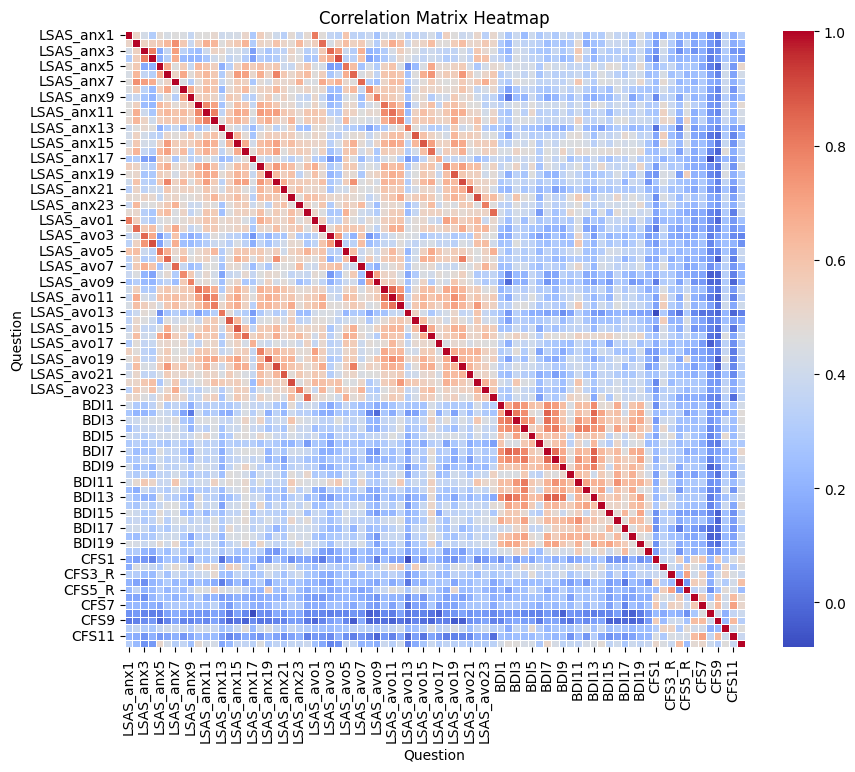

Explained Variance by each component:
[0.39991709 0.21363963]


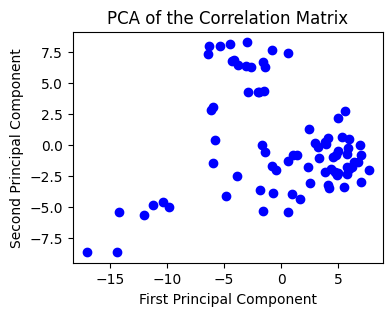

                PC1       PC2
Question                     
LSAS_anx1  0.117604  0.029363
LSAS_anx2  0.154257 -0.028806
LSAS_anx3  0.087955  0.015659
LSAS_anx4  0.071266  0.011268
LSAS_anx5  0.112058  0.075065
...             ...       ...
CFS8      -0.085629 -0.094476
CFS9      -0.133611 -0.086281
CFS10_R    0.018967 -0.025257
CFS11     -0.131535 -0.039736
CFS12     -0.046598  0.071646

[80 rows x 2 columns]


C:\Users\MadiL\AppData\Local\Temp\ipykernel_2420\1941899256.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loadings_df['PC1'], y=loadings_df.index, palette='coolwarm')


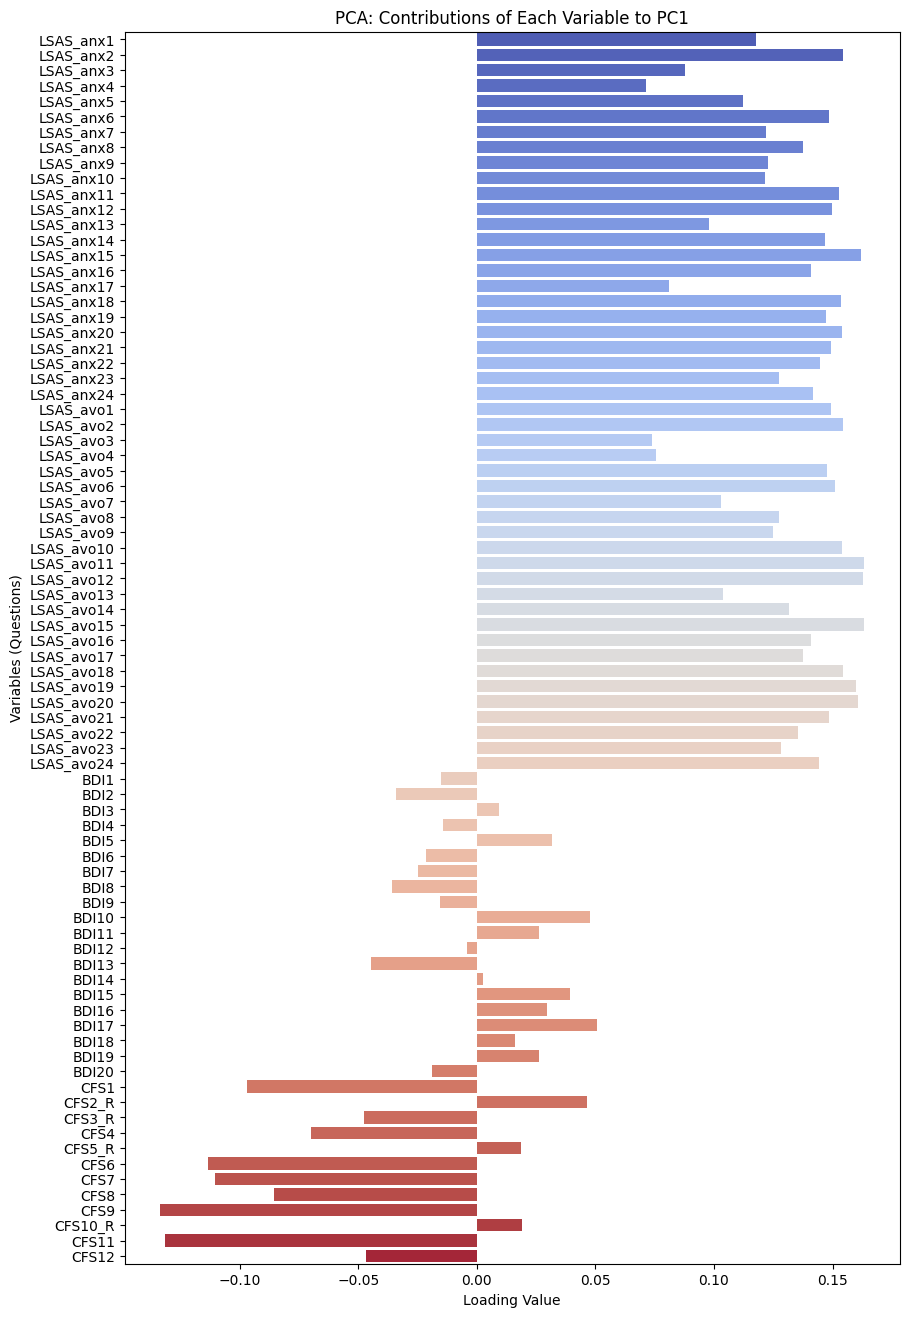

C:\Users\MadiL\AppData\Local\Temp\ipykernel_2420\1941899256.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loadings_df['PC2'], y=loadings_df.index, palette='coolwarm')


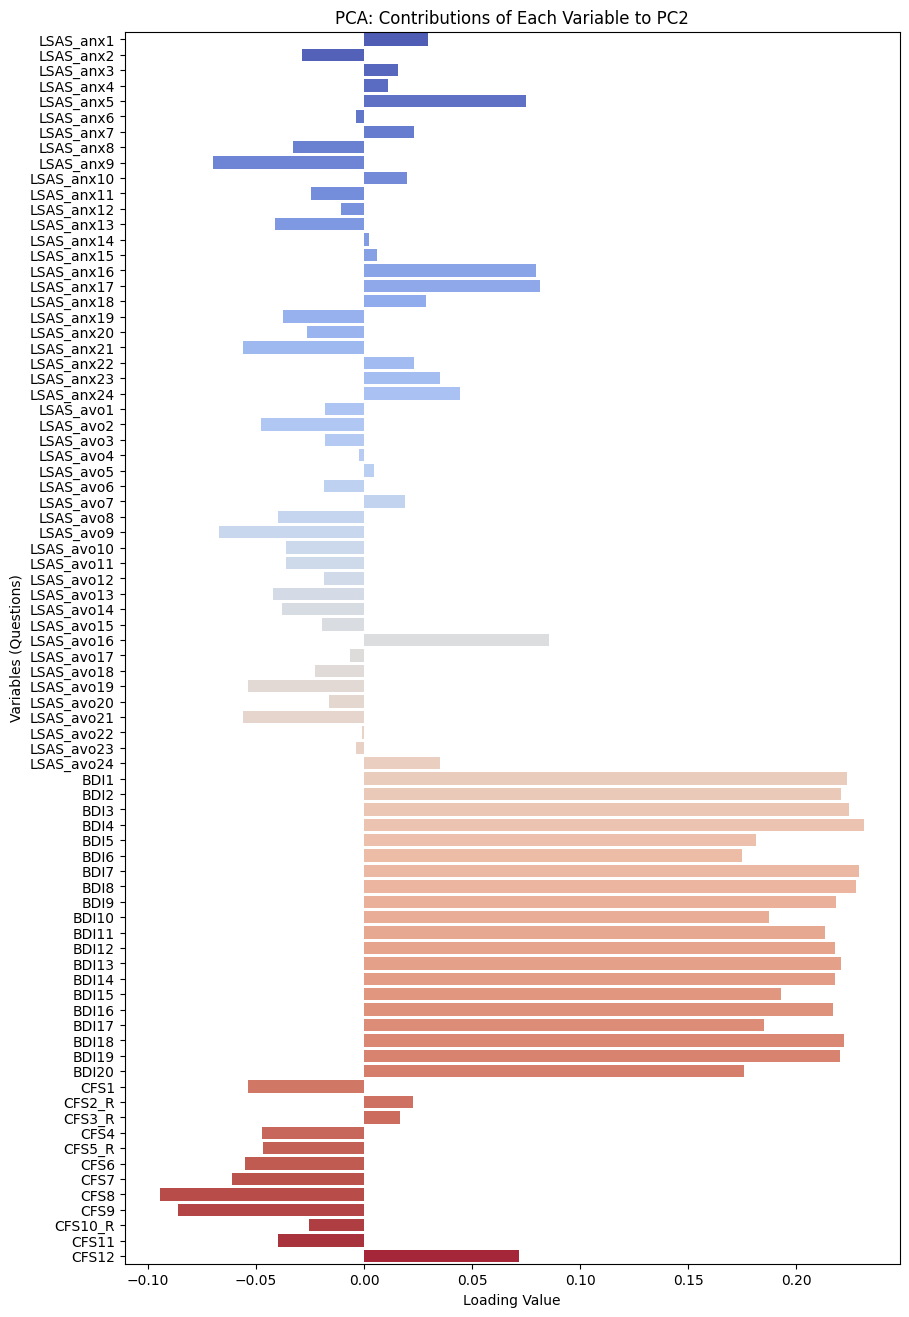

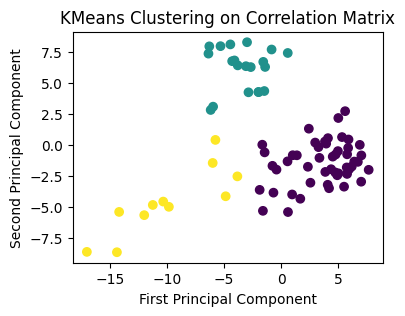

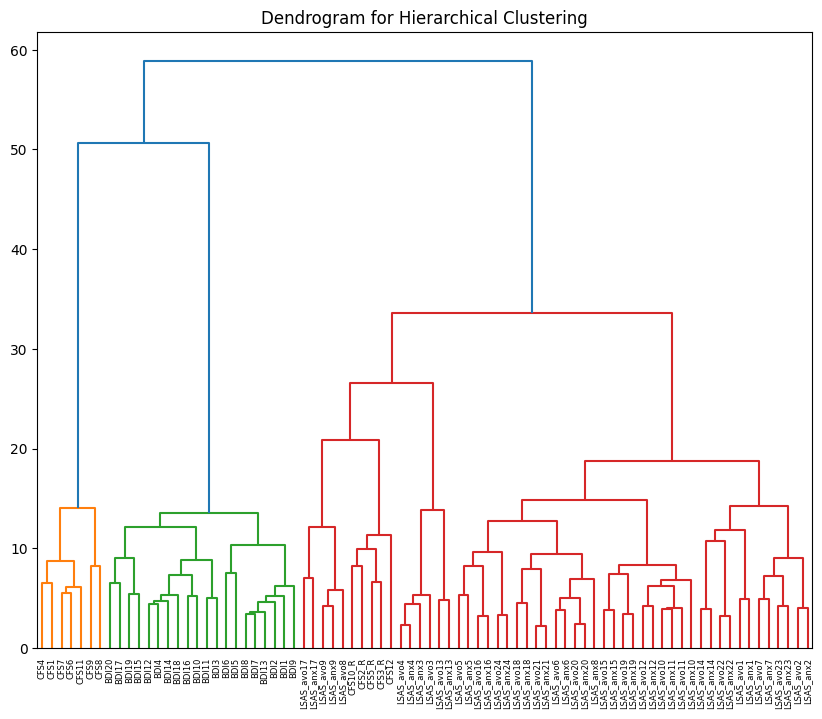

Moderately correlated pairs (above 0.7 correlation):
[('LSAS_anx1', 'LSAS_avo1', np.float64(0.8060826311715668)), ('LSAS_anx2', 'LSAS_anx7', np.float64(0.7534642993379803)), ('LSAS_anx2', 'LSAS_avo2', np.float64(0.8370277656479537)), ('LSAS_anx3', 'LSAS_anx4', np.float64(0.7935857022053185)), ('LSAS_anx3', 'LSAS_anx7', np.float64(0.7155889110252892)), ('LSAS_anx3', 'LSAS_avo3', np.float64(0.8444423508237744)), ('LSAS_anx3', 'LSAS_avo4', np.float64(0.7386635120534479)), ('LSAS_anx4', 'LSAS_avo4', np.float64(0.9028808389113161)), ('LSAS_anx5', 'LSAS_avo5', np.float64(0.8215840845548131)), ('LSAS_anx6', 'LSAS_anx15', np.float64(0.7222422136852168)), ('LSAS_anx6', 'LSAS_anx16', np.float64(0.7068494030147858)), ('LSAS_anx6', 'LSAS_anx20', np.float64(0.7843457990009698)), ('LSAS_anx6', 'LSAS_avo6', np.float64(0.8524660376998503)), ('LSAS_anx6', 'LSAS_avo16', np.float64(0.7399949927591046)), ('LSAS_anx6', 'LSAS_avo20', np.float64(0.734349986488609)), ('LSAS_anx7', 'LSAS_avo7', np.float64(0.84

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

merged_df = df_cleaned.pivot_table(index=['Participant_Number', 'EndDate'], columns='Question', values='Score').reset_index()

# Correlation matrix (pairwise correlations between LSAS, BDI, and CFS scores)
correlation_matrix = merged_df[question_columns].corr()


# 1. Summary Statistics
print("Summary Statistics of Correlation Matrix:")
print(correlation_matrix.describe())

# 2. Heatmap of the Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

# 3. Principal Component Analysis (PCA)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(correlation_matrix.fillna(0))  # Handle NaNs
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

print("Explained Variance by each component:")
print(pca.explained_variance_ratio_)

plt.figure(figsize=(4, 3))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='blue')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA of the Correlation Matrix')
plt.show()

# Get PCA components (loadings)
loadings = pca.components_

# Create a DataFrame to view the loadings for each original variable
loadings_df = pd.DataFrame(loadings.T, columns=[f"PC{i+1}" for i in range(loadings.shape[0])], 
                            index=merged_df[question_columns].columns)

# Print the loadings to see the contributions of each variable
print(loadings_df)

# Visualize loadings using a bar plot for the first principal component
plt.figure(figsize=(10, 16))
sns.barplot(x=loadings_df['PC1'], y=loadings_df.index, palette='coolwarm')
plt.title('PCA: Contributions of Each Variable to PC1')
plt.xlabel('Loading Value')
plt.ylabel('Variables (Questions)')
plt.show()

# You can repeat for other principal components (e.g., PC2)
plt.figure(figsize=(10, 16))
sns.barplot(x=loadings_df['PC2'], y=loadings_df.index, palette='coolwarm')
plt.title('PCA: Contributions of Each Variable to PC2')
plt.xlabel('Loading Value')
plt.ylabel('Variables (Questions)')
plt.show()

# 4. KMeans Clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_data)
clusters = kmeans.predict(scaled_data)

plt.figure(figsize=(4, 3))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters, cmap='viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('KMeans Clustering on Correlation Matrix')
plt.show()

# 5. Hierarchical Clustering (Dendrogram)
linked = linkage(scaled_data, 'ward')
plt.figure(figsize=(10, 8))
dendrogram(linked, labels=list(correlation_matrix.columns), orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()

# 6. Find Correlated Pairs
threshold = 0.7
highly_correlated_pairs = np.where(correlation_matrix > threshold)
highly_correlated = [(correlation_matrix.columns[x], correlation_matrix.columns[y], correlation_matrix.iloc[x, y])
                    for x, y in zip(*highly_correlated_pairs) if x != y and x < y]
print(f"Moderately correlated pairs (above {threshold} correlation):")
print(highly_correlated)


## Just CFS Correlation Matrix

<Axes: xlabel='Question', ylabel='Question'>

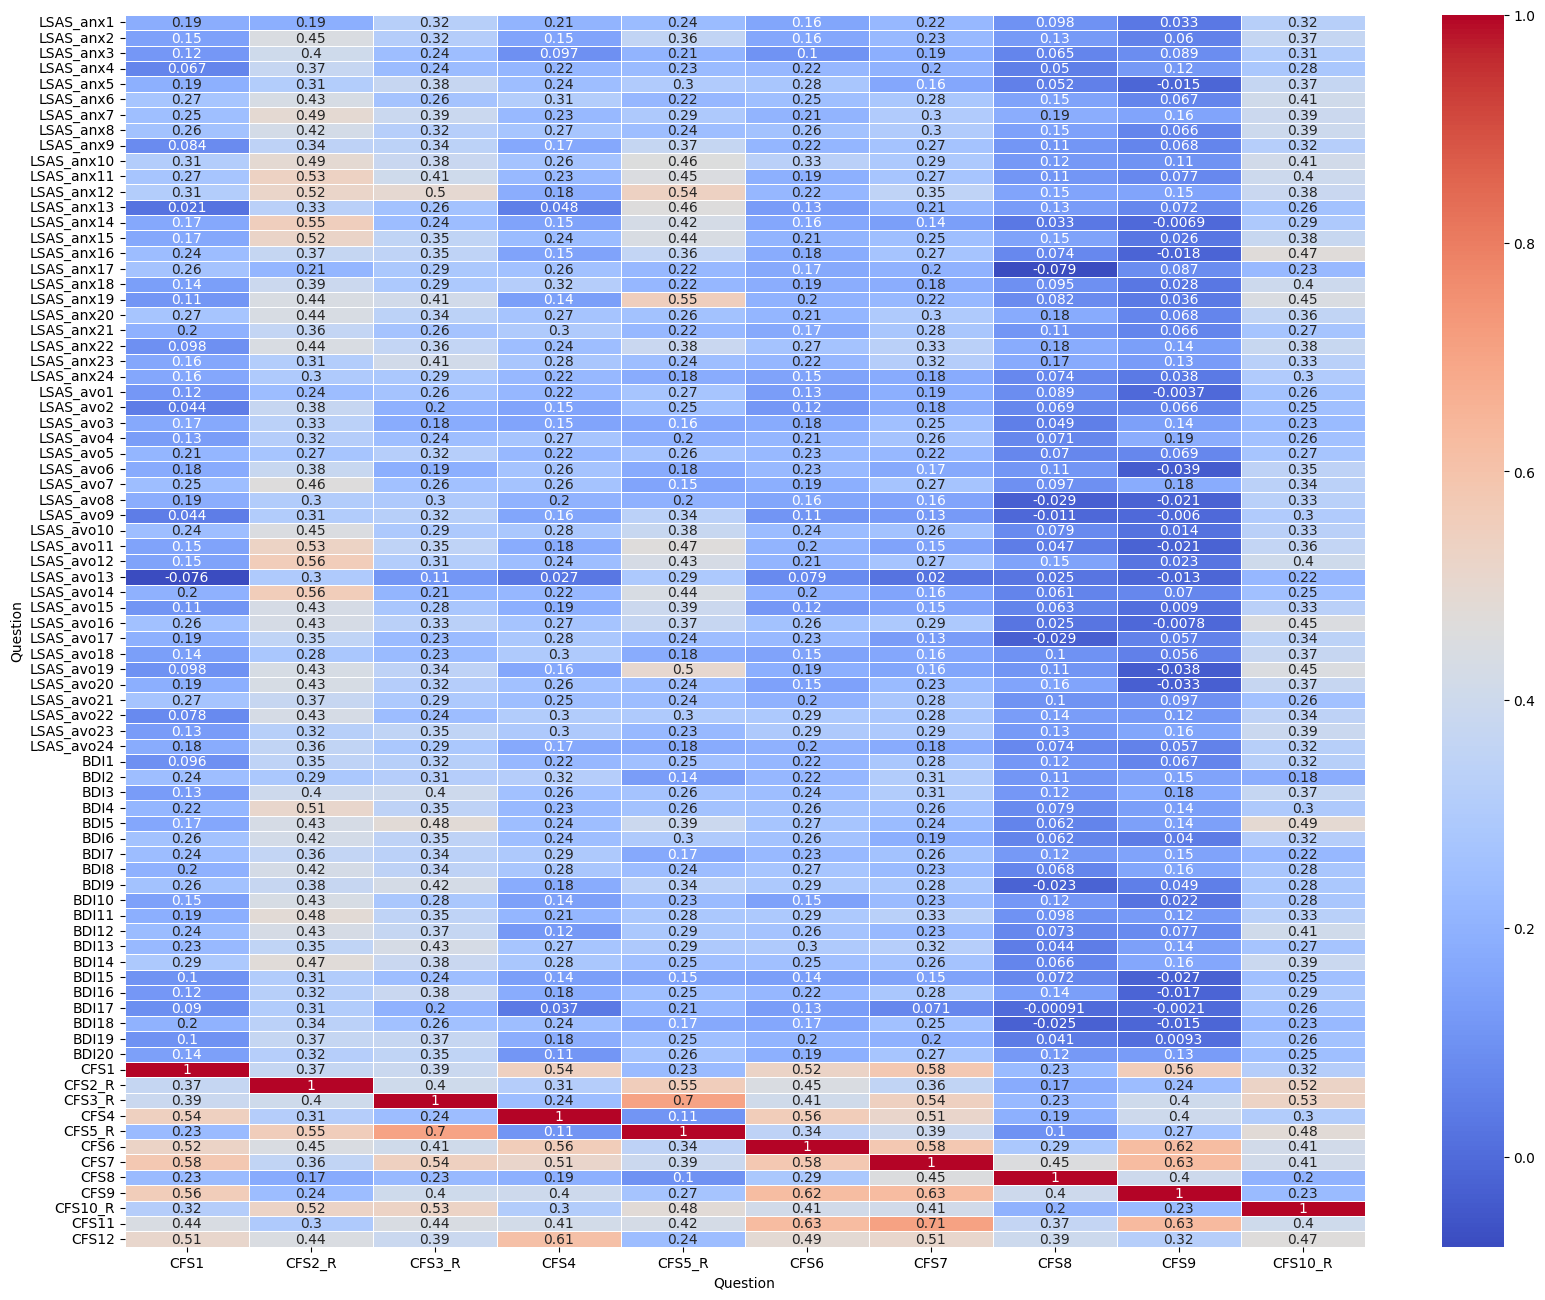

In [14]:

# Visualize the correlation matrix for CFS questions
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix.loc[:, ['CFS1', 'CFS2_R', 'CFS3_R', 'CFS4', 'CFS5_R', 'CFS6', 'CFS7', 'CFS8', 'CFS9', 'CFS10_R']], annot=True, cmap='coolwarm', linewidths=0.5)